# Heart Disease ML Project

OBSERVATION: Data Set Information: This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). Only 14 attributes used: 1.(age) 2.(sex) 3.(cp) 4.(trestbps) 5.(chol) 6.(fbs) 7.(restecg) 8.(thalach) 9.(exang) 10.(oldpeak) 11.(slope) 12.(ca) 13.(thal) 14.(num) (the predicted attribute)

In [1]:
# importing esential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the given dataset :
data=pd.read_csv('heartdisease_data.csv')

In [3]:
data.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [4]:
# lets check the first five records :
data.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
# lets check the last five records :
data.tail()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0
199,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [6]:
# shape of the dataset (Rows and Columns) :
data.shape

(200, 14)

In [7]:
# total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      200 non-null    int64 
 1   sex      200 non-null    int64 
 2   cp       200 non-null    int64 
 3   testbps  200 non-null    object
 4   chol     200 non-null    object
 5   fbs      200 non-null    object
 6   restecg  200 non-null    int64 
 7   thalach  200 non-null    object
 8   exang    200 non-null    object
 9   oldpeak  200 non-null    object
 10  slope    200 non-null    object
 11  ca       200 non-null    object
 12  thal     200 non-null    object
 13  num      200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [8]:
# checking the null values :
data.isnull().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

In [9]:
# here we will check the object datatypes :
data1=data.dtypes.loc[data.dtypes=='object']
data1

testbps    object
chol       object
fbs        object
thalach    object
exang      object
oldpeak    object
slope      object
ca         object
thal       object
dtype: object

In [10]:
# replacing the values with NaN :
data_final=data.replace('?',np.NaN)

In [11]:
data_final.isnull().sum()

age          0
sex          0
cp           0
testbps     56
chol         7
fbs          7
restecg      0
thalach     53
exang       53
oldpeak     56
slope      102
ca         198
thal       166
num          0
dtype: int64

In [12]:
data_final.drop('slope',axis=1,inplace=True)

In [13]:
data_final.drop('ca',axis=1,inplace=True)

In [14]:
data_final.drop('thal',axis=1,inplace=True)

In [15]:
data_final.isnull().sum()

age         0
sex         0
cp          0
testbps    56
chol        7
fbs         7
restecg     0
thalach    53
exang      53
oldpeak    56
num         0
dtype: int64

In [16]:
data_final.fillna(data_final['thalach'].median(),inplace=True)

In [17]:
data_final.isnull().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
num        0
dtype: int64

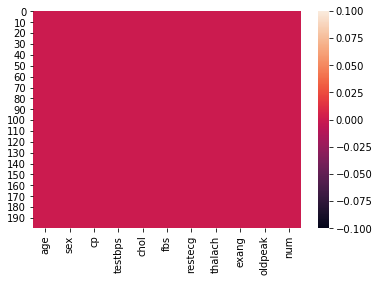

In [18]:
# check the null values by seaborn heatmap method :
sns.heatmap(data_final.isnull())

In [19]:
data_final.dtypes.loc[data_final.dtypes=='object']

testbps    object
chol       object
fbs        object
thalach    object
exang      object
oldpeak    object
dtype: object

# here we will change the datatypes below :


In [20]:
data_final['testbps']=data_final['testbps'].astype(str).astype(float)

In [21]:
data_final['chol']=data_final['chol'].astype(str).astype(float)

In [22]:
data_final['fbs']=data_final['fbs'].astype(str).astype(float)

In [23]:
data_final['thalach']=data_final['thalach'].astype(str).astype(float)

In [24]:
data_final['exang']=data_final['exang'].astype(str).astype(float)

In [25]:
data_final['oldpeak']=data_final['oldpeak'].astype(str).astype(float)

In [26]:
data_final.dtypes

age          int64
sex          int64
cp           int64
testbps    float64
chol       float64
fbs        float64
restecg      int64
thalach    float64
exang      float64
oldpeak    float64
num          int64
dtype: object

In [27]:
# Stastistical Analysis :
data_final.describe()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,176.69000,4.540000,0.735000,122.055000,32.275000,34.551000,1.520000
std,7.811697,0.171015,0.795701,19.280055,112.53334,22.049018,0.683455,18.876269,52.808551,53.428763,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,115.00000,0.000000,0.000000,112.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.00000,0.000000,1.000000,120.000000,1.000000,2.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.50000,1.000000,1.000000,130.000000,120.000000,120.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.00000,120.000000,2.000000,180.000000,120.000000,120.000000,4.000000


In [28]:
#Corelation:
dfr=data_final.corr()
dfr

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,num
age,1.000000,0.034230,-0.038280,0.167637,0.061775,-0.086177,0.002400,-0.150146,0.008975,-0.000958,0.287289
sex,0.034230,1.000000,0.038036,-0.002347,-0.098926,0.032304,0.060621,-0.004156,0.039312,0.046091,0.147470
cp,-0.038280,0.038036,1.000000,0.139569,0.060683,-0.019345,0.034790,-0.108585,-0.223605,-0.283783,0.168210
testbps,0.167637,-0.002347,0.139569,1.000000,0.124823,-0.024035,0.077503,0.014484,-0.307780,-0.309702,0.149265
chol,0.061775,-0.098926,0.060683,0.124823,1.000000,-0.163033,0.017025,-0.051823,0.093095,0.102328,0.071013
fbs,-0.086177,0.032304,-0.019345,-0.024035,-0.163033,1.000000,-0.042143,0.103026,-0.112915,-0.116205,0.009128
restecg,0.002400,0.060621,0.034790,0.077503,0.017025,-0.042143,1.000000,0.010094,0.033356,0.044505,-0.032800
thalach,-0.150146,-0.004156,-0.108585,0.014484,-0.051823,0.103026,0.010094,1.000000,-0.066114,0.011836,-0.073072
exang,0.008975,0.039312,-0.223605,-0.307780,0.093095,-0.112915,0.033356,-0.066114,1.000000,0.962534,-0.087054
oldpeak,-0.000958,0.046091,-0.283783,-0.309702,0.102328,-0.116205,0.044505,0.011836,0.962534,1.000000,-0.113455


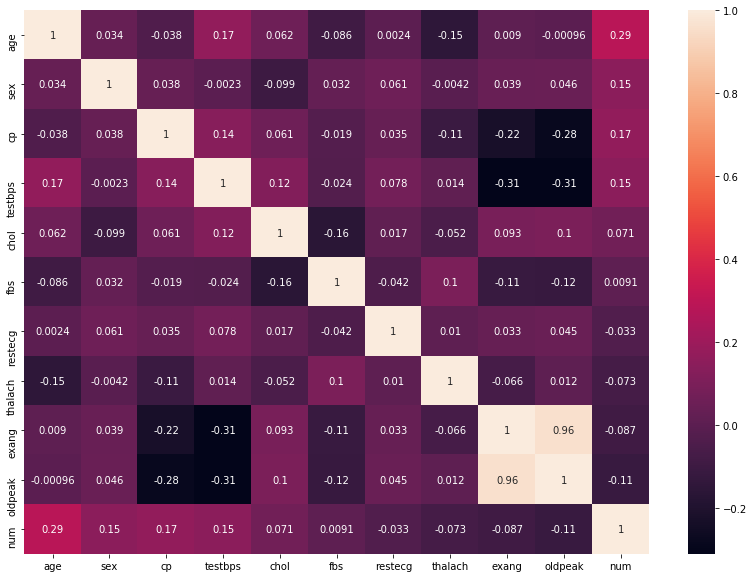

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True)

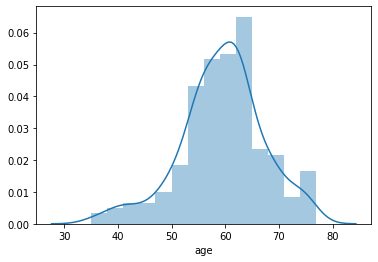

In [30]:
sns.distplot(data_final['age'])

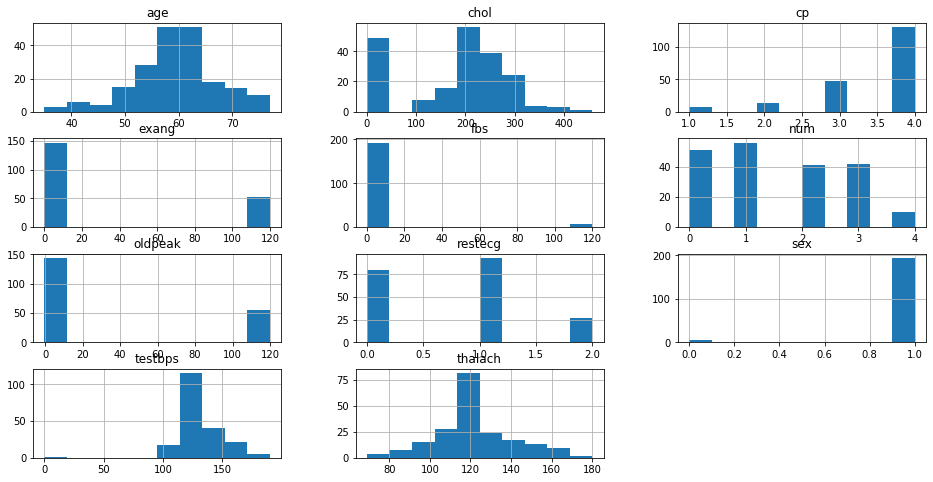

In [31]:
data_final.hist(figsize=(16,8))
plt.show()

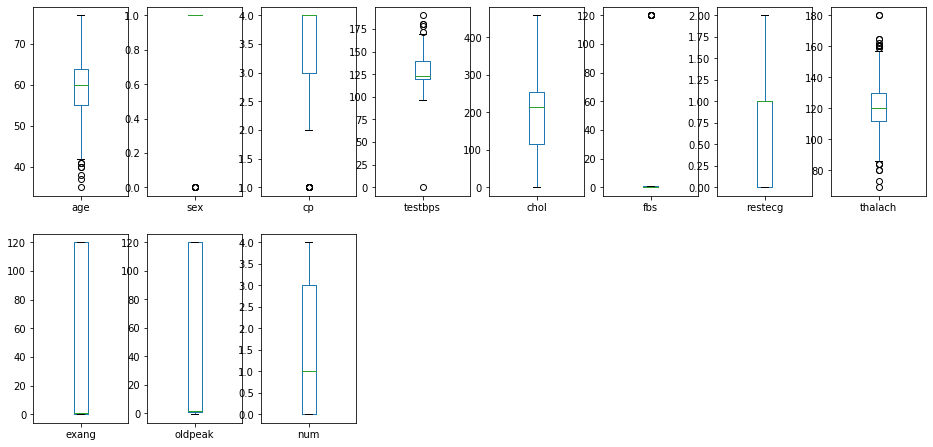

In [32]:
# checking outliers :
data_final.plot(kind='box',subplots=True,layout=(4,8),fontsize=10,figsize=(16,16))
plt.show()

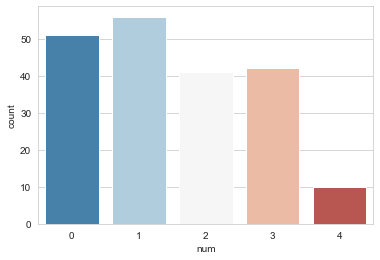

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='num',data=data_final,palette='RdBu_r')

In [34]:
data_final.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
testbps   -0.773003
chol      -0.513644
fbs        5.094988
restecg    0.391463
thalach    0.265689
exang      1.072812
oldpeak    0.986344
num        0.297393
dtype: float64

In [35]:
# we will use for loop for removing skewness :
for i in data_final.columns:
    if data_final.skew().loc[i]>0.55:
        data_final[i]=np.log1p(data_final[i])

In [36]:
data_final.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
testbps   -0.773003
chol      -0.513644
fbs        4.087652
restecg    0.391463
thalach    0.265689
exang      0.997892
oldpeak    0.796630
num        0.297393
dtype: float64

In [37]:
# we will use for loop for removing skewness :
for i in data_final.columns:
    if data_final.skew().loc[i]>0.55:
        data_final[i]=np.log1p(data_final[i])

In [38]:
data_final.skew()

age       -0.404091
sex       -5.552105
cp        -1.648734
testbps   -0.773003
chol      -0.513644
fbs        2.226272
restecg    0.391463
thalach    0.265689
exang      0.698620
oldpeak    0.183497
num        0.297393
dtype: float64

In [39]:
data_final.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140.0,260.0,0.000000,1,112.0,0.526589,0.869742,2
1,44,1,4,130.0,209.0,0.000000,1,127.0,0.000000,0.000000,0
2,60,1,4,132.0,218.0,0.000000,1,140.0,0.526589,0.650391,2
3,55,1,4,142.0,228.0,0.000000,1,149.0,0.526589,0.812157,1
4,66,1,3,110.0,213.0,0.526589,2,99.0,0.526589,0.605904,0


In [40]:
data_final['num'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
list=['age','chol','thalach','oldpeak','sex','cp','restecg']
data_final[list]=sc.fit_transform(data_final[list])

In [42]:
X=data_final.drop('num',axis=1)
y=data_final['num']

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for i in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [44]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.23500000000000001

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=42)

In [46]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.22727272727272727
[[ 8  0  0  0  0]
 [12  2  0  0  0]
 [ 9  2  0  0  0]
 [ 7  1  0  0  0]
 [ 2  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.21      1.00      0.35         8
           1       0.33      0.14      0.20        14
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3

    accuracy                           0.23        44
   macro avg       0.11      0.23      0.11        44
weighted avg       0.14      0.23      0.13        44



C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [49]:
# we will make list of algorithm and add to for loop and check the score :
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.38636363636363635
[[3 2 2 1 0]
 [3 8 1 2 0]
 [2 5 2 2 0]
 [2 2 0 4 0]
 [0 0 0 3 0]]
              precision    recall  f1-score   support

           0       0.30      0.38      0.33         8
           1       0.47      0.57      0.52        14
           2       0.40      0.18      0.25        11
           3       0.33      0.50      0.40         8
           4       0.00      0.00      0.00         3

    accuracy                           0.39        44
   macro avg       0.30      0.33      0.30        44
weighted avg       0.36      0.39      0.36        44



Accuracy score of

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.29545454545454547
[[3 2 1 2 0]
 [7 4 1 1 1]
 [1 3 4 3 0]
 [1 3 1 2 1]
 [1 0 0 2 0]]
              precision    recall  f1-score   support

           0       0.23      0.38      0.29         8
           1       0.33      0.29      0.31        14
           2       0.57      0.36      0.44        11
           3       0.20      0.25      0.22         8
           4       0.00      0.00      0.00         3

    accuracy                           0.30        44
   macro avg       0.27      0.25      0.25        44
weighted avg       0.33      0.30      0.30     

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
0.29545454545454547
[[2 3 1 2 0]
 [5 7 2 0 0]
 [2 4 2 3 0]
 [3 2 0 2 1]
 [1 0 0 2 0]]
              precision    recall  f1-score   support

           0       0.15      0.25      0.19         8
           1       0.44      0.50      0.47        14
           2       0.40      0.18      0.25        11
           3       0.22      0.25      0.24         8
           4       0.00      0.00      0.00         3

    accuracy       

In [50]:
import joblib
joblib.dump(RandomForestClassifier,'Project_5_HeartDisease.pkl')

['Project_5_HeartDisease.pkl']

Conclusion:1) These problem we have solved by Classification. 2) We have done EDA process, Feature Engineering, Model Selection, finding the right model. 3) for Clasification problem (RandomForestClassifier is best) 4) Saving the model.
#Thankyou!!